In [15]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [53]:
image_path = '../datasets/test/lines-region-test.jpg'
image = cv2.imread(image_path)
output = image.copy()
# cv2.HoughCircles can only handle an 8-bit single channel image
greyscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

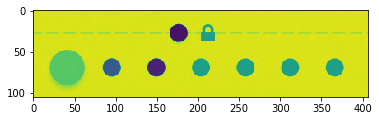

In [54]:
plt.imshow(greyscale_image)

In [55]:
# Use HoughCircles to find circles in the image, these parameters need tweaking to ensure valid results
circles = cv2.HoughCircles(
    image=greyscale_image, 
    method=cv2.HOUGH_GRADIENT, 
    dp=1, 
    minDist=1, 
    param1=50,
    param2=30,
    minRadius=0,
    maxRadius=0,
)

In [56]:
print(circles)

[[[ 41.5  69.5  21.1]
  [176.5  27.5  11.1]
  [257.5  68.5  11.1]
  [149.5  68.5  10.3]
  [311.5  68.5  10.5]
  [203.5  68.5  10.3]
  [ 95.5  68.5  10.3]
  [366.5  68.5  10.3]]]


In [57]:
# Draw circles on original image
if circles is not None:
    # Convert the co-ordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        # Draw circle on original image
        cv2.circle(output, (x, y), r, (0, 255, 0), 2)

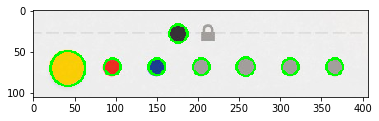

In [59]:
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
plt.imshow(output)

In [ ]:
# Here we can see the circles are successfully discovered, regardless of size